In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
from inspector import Inspector
from tqdm import tqdm
import sqlite3 as sl
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
config = load_config_and_check("../config/qmt_v03.yaml")

In [4]:
from metamorph import *
from qmt import get_mr_function_and_kwargs

In [5]:
from metamorph_test import show_tree

In [6]:
show_tree("""
qr_qr = QuantumRegister(9, name='qr_qr')
cr_qr = ClassicalRegister(9, name='cr_qr')
qc = QuantumCircuit(qr_qr, cr_qr, name='qc')
qc.append(SXdgGate(), qargs=[qr_qr[7]], cargs=[])
qc.append(ECRGate(), qargs=[qr_qr[2], qr_qr[6]], cargs=[])
qc.append(iSwapGate(), qargs=[qr_qr[5], qr_qr[4]], cargs=[])
# SECTION
""")

Module(
    body=[
        Assign(
            lineno=2,
            col_offset=0,
            end_lineno=2,
            end_col_offset=40,
            targets=[Name(lineno=2, col_offset=0, end_lineno=2, end_col_offset=5, id='qr_qr', ctx=Store())],
            value=Call(
                lineno=2,
                col_offset=8,
                end_lineno=2,
                end_col_offset=40,
                func=Name(lineno=2, col_offset=8, end_lineno=2, end_col_offset=23, id='QuantumRegister', ctx=Load()),
                args=[Constant(lineno=2, col_offset=24, end_lineno=2, end_col_offset=25, value=9, kind=None)],
                keywords=[
                    keyword(
                        arg='name',
                        value=Constant(lineno=2, col_offset=32, end_lineno=2, end_col_offset=39, value='qr_qr', kind=None),
                    ),
                ],
            ),
            type_comment=None,
        ),
        Assign(
            lineno=3,
            col_offset=0

In [24]:
config_3 = load_config_and_check("../config/qmt_v03.yaml")

np.random.seed(36)
random.seed(36)

morph, kwargs = get_mr_function_and_kwargs(config_3, metamorphic_strategy="inject_circuits_and_inverse")
out_code = morph("""
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr_qr = QuantumRegister(9, name='qr_qr')
cr_qr = ClassicalRegister(9, name='cr_qr')
qc = QuantumCircuit(qr_qr, cr_qr, name='qc')
qc.append(SXdgGate(), qargs=[qr_qr[7]], cargs=[])
qc.append(ECRGate(), qargs=[qr_qr[2], qr_qr[6]], cargs=[])
qc.append(iSwapGate(), qargs=[qr_qr[5], qr_qr[4]], cargs=[])


# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=0, coupling_map=None)

# SECTION
# NAME: MEASUREMENT

qc.measure(qr_qr, cr_qr)

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_efb784840b7d41c9b4f9139f73da3c40 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_efb784840b7d41c9b4f9139f73da3c40, shots=44340).result().get_counts(qc)
RESULT = counts

""", **kwargs)[0]
print(out_code)

# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr_qr = QuantumRegister(9, name='qr_qr')
cr_qr = ClassicalRegister(9, name='cr_qr')
qc = QuantumCircuit(qr_qr, cr_qr, name='qc')
qc.append(SXdgGate(), qargs=[qr_qr[7]], cargs=[])
qc.append(ECRGate(), qargs=[qr_qr[2], qr_qr[6]], cargs=[])


subcircuit = QuantumCircuit(qr_qr, cr_qr, name='subcircuit')
subcircuit.append(SXGate(), qargs=[qr_qr[0]], cargs=[])
subcircuit.append(CRXGate(1.1721710219304895), qargs=[qr_qr[4], qr_qr[3]], cargs=[])
subcircuit.append(TGate(), qargs=[qr_qr[0]], cargs=[])
subcircuit.append(RYYGate(0.7168749499743002), qargs=[qr_qr[4], qr_qr[7]], cargs=[])
subcircuit.append(PhaseGate(1.4073735856613805), qargs=[qr_qr[0]], cargs=[])

qc.append(subcircuit, qargs=('qr_qr',), cargs=cr_qr))
qc.append(subcircuit.inverse(), qargs=('qr_qr',), cargs=cr_qr))
qc.append(iSwapGate(), qargs=[q

In [10]:
%debug

> /home/paltenmo/projects/ML4Quantum/notebooks/mtrand.pyx(905)numpy.random.mtrand.RandomState.choice()

ipdb> list

ipdb> q


In [8]:
master = list(range(10))
slave = ['a', 'b', 'c']
for s in slave[::-1]:
    master.insert(3, s)
master

[0, 1, 2, 'a', 'b', 'c', 3, 4, 5, 6, 7, 8, 9]

In [11]:
import re
in_str = """qr_qr = QuantumRegister(9, name='qr_qr')
cr_qr = ClassicalRegister(9, name='cr_qr')
qc = QuantumCircuit(qr_qr, cr_qr, name='qc')
qc.append(SXdgGate(), qargs=[qr_qr[7]], cargs=[])
qc.append(ECRGate(), qargs=[qr_qr[2], qr_qr[6]], cargs=[])
qc.append(iSwapGate(), qargs=[qr_qr[5], qr_qr[4]], cargs=[])"""
m = re.search("([a-zA-Z_]*)\s=\sQuantumCircuit", in_str)
m.group(1)

'qc'

# DEBUG: Circuit Inverse

## Source

In [32]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(9, name='qr')
cr = ClassicalRegister(9, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(RXGate(1.0466978673929275), qargs=[qr[8]], cargs=[])
qc.append(CSXGate(), qargs=[qr[6], qr[8]], cargs=[])
qc.append(TGate(), qargs=[qr[8]], cargs=[])
qc.append(SGate(), qargs=[qr[3]], cargs=[])
qc.append(YGate(), qargs=[qr[3]], cargs=[])
qc.append(HGate(), qargs=[qr[2]], cargs=[])
qc.append(CHGate(), qargs=[qr[4], qr[8]], cargs=[])
qc.append(RXXGate(5.7659340219179), qargs=[qr[6], qr[0]], cargs=[])
qc.append(CSXGate(), qargs=[qr[3], qr[2]], cargs=[])
qc.append(SdgGate(), qargs=[qr[2]], cargs=[])
qc.append(CU1Gate(3.220809006787041), qargs=[qr[1], qr[2]], cargs=[])
qc.append(CRXGate(4.114874291132263), qargs=[qr[8], qr[3]], cargs=[])
qc.append(C4XGate(), qargs=[qr[5], qr[4], qr[1], qr[8], qr[0]], cargs=[])
qc.append(RXGate(3.310801310361946), qargs=[qr[7]], cargs=[])
qc.append(CRXGate(0.21066257384036904), qargs=[qr[4], qr[1]], cargs=[])
qc.append(RXXGate(3.383586268608996), qargs=[qr[5], qr[6]], cargs=[])
qc.append(CRXGate(5.3577349048578995), qargs=[qr[2], qr[4]], cargs=[])
qc.append(DCXGate(), qargs=[qr[2], qr[1]], cargs=[])
qc.append(HGate(), qargs=[qr[3]], cargs=[])
qc.append(YGate(), qargs=[qr[8]], cargs=[])
qc.append(CUGate(1.4448880414773706,6.196463507862305,2.6824327601845965,2.4820808033150423), qargs=[qr[6], qr[7]], cargs=[])
qc.append(SXdgGate(), qargs=[qr[2]], cargs=[])
qc.append(CHGate(), qargs=[qr[0], qr[6]], cargs=[])
qc.append(CU1Gate(3.5570675263725655), qargs=[qr[5], qr[6]], cargs=[])

# SECTION
# NAME: OPTIMIZATION_PASSES

qc.draw(fold=-1)

┌──────────────┐                                 ┌───┐                                                                            
qr_0: ────────────────────┤1             ├─────────────────────────────────┤ X ├────────────────────────────────────────────────────────────■───────────────
                          │              │                                 └─┬─┘┌─────────────┐                                   ┌──────┐  │               
qr_1: ────────────────────┤              ├─────────────────────■─────────────■──┤ Rx(0.21066) ├───────────────────────────────────┤1     ├──┼───────────────
          ┌───┐           │              │┌────┐   ┌─────┐     │U1(3.2208)   │  └──────┬──────┘                                   │  Dcx │  │     ┌──────┐  
qr_2: ────┤ H ├───────────┤              ├┤ Sx ├───┤ Sdg ├─────■─────────────┼─────────┼────────────────────────■─────────────────┤0     ├──┼─────┤ √Xdg ├──
          ├───┤     ┌───┐ │              │└─┬──┘┌──┴─────┴───┐    ┌───┐      │         │                        │                 └──────┘  │     └──────┘  
qr_3: ────┤ S ├─────┤ Y ├─┤  Rxx(5.7659) ├──■───┤ Rx(4.1149) ├────┤ H ├──────┼─────────┼────────────────────────┼───────────────────────────┼───────────────
          └───┘     └───┘ │              │      └─────┬──────┘    └───┘      │         │                  ┌─────┴──────┐                    │               
qr_4: ────────────────────┤              ├──■─────────┼──────────────────────■─────────■──────────────────┤ Rx(5.3577) ├────────────────────┼───────────────
                          │              │  │         │                      │  ┌──────────────┐          └────────────┘                    │               
qr_5: ────────────────────┤              ├──┼─────────┼──────────────────────■──┤0             ├────────────────────────────────────────────┼───■───────────
                          │              │  │         │                      │  │  Rxx(3.3836) │                                          ┌─┴─┐ │U1(3.5571) 
qr_6: ────────────────■───┤0             ├──┼─────────┼──────────────────────┼──┤1             ├────────────────■─────────────────────────┤ H ├─■───────────
      ┌────────────┐  │   └──────────────┘  │         │                      │  └──────────────┘┌───────────────┴────────────────┐        └───┘             
qr_7: ┤ Rx(3.3108) ├──┼─────────────────────┼─────────┼──────────────────────┼──────────────────┤ U(1.4449,6.1965,2.6824,2.4821) ├──────────────────────────
      ├────────────┤┌─┴──┐     ┌───┐      ┌─┴─┐       │                      │       ┌───┐      └────────────────────────────────┘                          
qr_8: ┤ Rx(1.0467) ├┤ Sx ├─────┤ T ├──────┤ H ├───────■──────────────────────■───────┤ Y ├──────────────────────────────────────────────────────────────────
      └────────────┘└────┘     └───┘      └───┘                                      └───┘                                                                  
cr: 9/══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [33]:
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=3, coupling_map=None)

# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_661deef4586e46bb8de45912e0ed68ee = Aer.get_backend('qasm_simulator')
counts_source = execute(qc, backend=backend_661deef4586e46bb8de45912e0ed68ee, shots=3919).result().get_counts(qc)
counts_source

{'010001100': 1,
 '110001010': 4,
 '001100011': 1,
 '110111011': 3,
 '111111111': 1,
 '101000101': 1,
 '011101011': 2,
 '010000100': 2,
 '010111111': 1,
 '110001110': 4,
 '010000110': 2,
 '110000100': 3,
 '010101001': 4,
 '110101011': 9,
 '110001000': 3,
 '110110011': 2,
 '110011010': 1,
 '111101101': 13,
 '111100001': 11,
 '110101111': 7,
 '001110110': 10,
 '010101011': 2,
 '101001001': 1,
 '001101010': 36,
 '011101101': 3,
 '011100011': 4,
 '011101010': 42,
 '111101011': 7,
 '110100101': 13,
 '111110011': 3,
 '010100111': 3,
 '010101111': 4,
 '111101111': 14,
 '011100111': 2,
 '001111110': 10,
 '010001010': 1,
 '001100010': 48,
 '110111111': 2,
 '011101110': 34,
 '101111110': 30,
 '011111010': 14,
 '010001000': 1,
 '111100100': 168,
 '011100000': 59,
 '110110111': 2,
 '101101110': 115,
 '011101000': 69,
 '111111011': 2,
 '101101100': 150,
 '101101000': 174,
 '010011010': 1,
 '110100001': 13,
 '001101110': 47,
 '111100010': 161,
 '110000010': 7,
 '011110011': 1,
 '111101000': 172,
 '1

## Follow

In [34]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(9, name='qr')
cr = ClassicalRegister(9, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(RXGate(1.0466978673929275), qargs=[qr[8]], cargs=[])
qc.append(CSXGate(), qargs=[qr[6], qr[8]], cargs=[])
qc.append(TGate(), qargs=[qr[8]], cargs=[])
qc.append(SGate(), qargs=[qr[3]], cargs=[])
qc.append(YGate(), qargs=[qr[3]], cargs=[])
qc.append(HGate(), qargs=[qr[2]], cargs=[])
qc.append(CHGate(), qargs=[qr[4], qr[8]], cargs=[])
qc.append(RXXGate(5.7659340219179), qargs=[qr[6], qr[0]], cargs=[])
qc.append(CSXGate(), qargs=[qr[3], qr[2]], cargs=[])
qc.append(SdgGate(), qargs=[qr[2]], cargs=[])
qc.append(CU1Gate(3.220809006787041), qargs=[qr[1], qr[2]], cargs=[])
qc.append(CRXGate(4.114874291132263), qargs=[qr[8], qr[3]], cargs=[])
qc.append(C4XGate(), qargs=[qr[5], qr[4], qr[1], qr[8], qr[0]], cargs=[])
qc.append(RXGate(3.310801310361946), qargs=[qr[7]], cargs=[])
qc.append(CRXGate(0.21066257384036904), qargs=[qr[4], qr[1]], cargs=[])
qc.append(RXXGate(3.383586268608996), qargs=[qr[5], qr[6]], cargs=[])
qc.append(CRXGate(5.3577349048578995), qargs=[qr[2], qr[4]], cargs=[])
qc.append(DCXGate(), qargs=[qr[2], qr[1]], cargs=[])
qc.append(HGate(), qargs=[qr[3]], cargs=[])
qc.append(YGate(), qargs=[qr[8]], cargs=[])


subcircuit = QuantumCircuit(qr, cr, name='subcircuit')

qc.append(subcircuit, qargs=qr, cargs=cr)
qc.append(subcircuit.inverse(), qargs=qr, cargs=cr)
qc.append(CUGate(1.4448880414773706, 6.196463507862305, 2.6824327601845965, 2.4820808033150423), qargs=[qr[6], qr[7]], cargs=[])
qc.append(SXdgGate(), qargs=[qr[2]], cargs=[])
qc.append(CHGate(), qargs=[qr[0], qr[6]], cargs=[])
qc.append(CU1Gate(3.5570675263725655), qargs=[qr[5], qr[6]], cargs=[])
# SECTION
# NAME: OPTIMIZATION_PASSES

qc.draw(fold=-1)

/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/qiskit/visualization/text.py:665: RuntimeWarning: The parameter "cregbundle" was disabled, since an instruction needs to refer to individual classical wires
  return "\n".join(self.lines()).encode(self.encoding).decode(self.encoding)


┌──────────────┐                                 ┌───┐                                      ┌─────────────┐┌────────────────┐                                                    
qr_0: ────────────────────┤1             ├─────────────────────────────────┤ X ├──────────────────────────────────────┤0            ├┤0               ├────────────────────────────────────■───────────────
                          │              │                                 └─┬─┘┌─────────────┐               ┌──────┐│             ││                │                                    │               
qr_1: ────────────────────┤              ├─────────────────────■─────────────■──┤ Rx(0.21066) ├───────────────┤1     ├┤1            ├┤1               ├────────────────────────────────────┼───────────────
          ┌───┐           │              │┌────┐   ┌─────┐     │U1(3.2208)   │  └──────┬──────┘               │  Dcx ││             ││                │             ┌──────┐               │               
qr_2: ────┤ H ├───────────┤              ├┤ Sx ├───┤ Sdg ├─────■─────────────┼─────────┼──────────────■───────┤0     ├┤2            ├┤2               ├─────────────┤ √Xdg ├───────────────┼───────────────
          ├───┤     ┌───┐ │              │└─┬──┘┌──┴─────┴───┐    ┌───┐      │         │              │       └──────┘│             ││                │             └──────┘               │               
qr_3: ────┤ S ├─────┤ Y ├─┤  Rxx(5.7659) ├──■───┤ Rx(4.1149) ├────┤ H ├──────┼─────────┼──────────────┼───────────────┤3            ├┤3               ├────────────────────────────────────┼───────────────
          └───┘     └───┘ │              │      └─────┬──────┘    └───┘      │         │        ┌─────┴──────┐        │             ││                │                                    │               
qr_4: ────────────────────┤              ├──■─────────┼──────────────────────■─────────■────────┤ Rx(5.3577) ├────────┤4            ├┤4               ├────────────────────────────────────┼───────────────
                          │              │  │         │                      │  ┌──────────────┐└────────────┘        │             ││                │                                    │               
qr_5: ────────────────────┤              ├──┼─────────┼──────────────────────■──┤0             ├──────────────────────┤5            ├┤5               ├────────────────────────────────────┼───■───────────
                          │              │  │         │                      │  │  Rxx(3.3836) │                      │             ││                │                                  ┌─┴─┐ │U1(3.5571) 
qr_6: ────────────────■───┤0             ├──┼─────────┼──────────────────────┼──┤1             ├──────────────────────┤6            ├┤6               ├────────────────■─────────────────┤ H ├─■───────────
      ┌────────────┐  │   └──────────────┘  │         │                      │  └──────────────┘                      │             ││                │┌───────────────┴────────────────┐└───┘             
qr_7: ┤ Rx(3.3108) ├──┼─────────────────────┼─────────┼──────────────────────┼────────────────────────────────────────┤7            ├┤7               ├┤ U(1.4449,6.1965,2.6824,2.4821) ├──────────────────
      ├────────────┤┌─┴──┐     ┌───┐      ┌─┴─┐       │                      │       ┌───┐                            │             ││                │└────────────────────────────────┘                  
qr_8: ┤ Rx(1.0467) ├┤ Sx ├─────┤ T ├──────┤ H ├───────■──────────────────────■───────┤ Y ├────────────────────────────┤8            ├┤8               ├────────────────────────────────────────────────────
      └────────────┘└────┘     └───┘      └───┘                                      └───┘                            │  subcircuit ││  subcircuit_dg │                                                    
cr_0: ════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡0            ╞╡0               

In [35]:
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=3, coupling_map=None)
# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)
# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_661deef4586e46bb8de45912e0ed68ee = Aer.get_backend('qasm_simulator')
counts_follow = execute(qc, backend=backend_661deef4586e46bb8de45912e0ed68ee, shots=3919).result().get_counts(qc)
counts_follow

{'011111111': 1,
 '110001110': 2,
 '011100011': 1,
 '000001111': 1,
 '010001100': 2,
 '010111111': 3,
 '110110011': 1,
 '010101001': 3,
 '011101001': 4,
 '110010110': 3,
 '010100001': 1,
 '010000110': 1,
 '110000100': 4,
 '011101011': 4,
 '011111011': 3,
 '010000100': 2,
 '111101011': 7,
 '111101111': 8,
 '110101011': 9,
 '011110111': 2,
 '010110111': 2,
 '110010010': 1,
 '110000110': 4,
 '110100101': 10,
 '111101101': 15,
 '110001000': 6,
 '001111110': 11,
 '011100111': 4,
 '010100111': 6,
 '111110011': 2,
 '001110110': 16,
 '010101101': 5,
 '110101101': 11,
 '010001110': 3,
 '011110010': 18,
 '110001100': 6,
 '101100110': 143,
 '101111110': 36,
 '111110010': 40,
 '101100010': 129,
 '101100000': 156,
 '011101010': 37,
 '110000000': 1,
 '110000111': 1,
 '111100011': 13,
 '010101111': 3,
 '011100010': 42,
 '001101100': 66,
 '111100010': 145,
 '011110110': 13,
 '111100110': 129,
 '010100101': 4,
 '101110010': 43,
 '111111011': 1,
 '101101100': 171,
 '101101000': 155,
 '110100001': 16,
 '

## Compare

In [38]:
from inspector import OneNightStandInspector
from detectors import KS_Detector, Energy_Detector

In [41]:
detector = KS_Detector()
stat, pval = detector.check(counts_source, counts_follow)
print(f"stat: {stat}, pval: {pval}")

stat: 0.02475121204388875, pval: 0.18115503451299927


n_qubits: 9
n_shots: 3919.0
Uniform threshold: 7.654296875


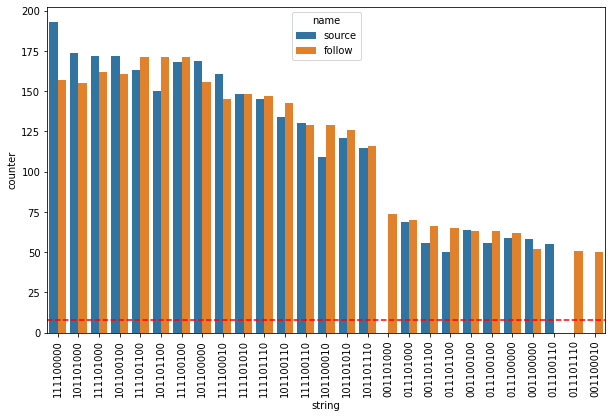

In [40]:
OneNightStandInspector(counts_source, counts_follow, name_a="source", name_b="follow", top_perc=1)